### Detect Data Drift
**Description**: Data drift can occur when the statistical properties of your data change over time. Learn to detect data drift using visualizations.

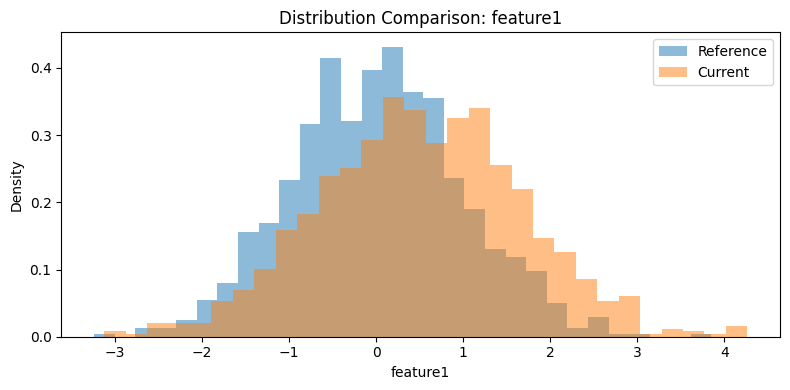

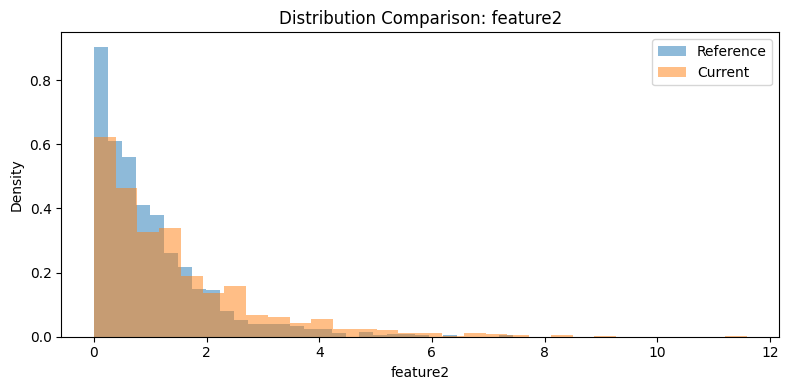

Feature: feature1
  KS statistic = 0.2200
  p-value       = 0.0000
  ⚠️  Data drift detected (p < 0.05)

Feature: feature2
  KS statistic = 0.1430
  p-value       = 0.0000
  ⚠️  Data drift detected (p < 0.05)



In [2]:
# detect_data_drift.py

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp

# Optional: Uncomment these lines if you want to use Evidently
# pip install evidently
# from evidently.report import Report
# from evidently.metric_preset import DataDriftPreset

def generate_data(seed=42):
    """
    Generates synthetic reference and current datasets.
    """
    np.random.seed(seed)
    reference = pd.DataFrame({
        'feature1': np.random.normal(loc=0.0, scale=1.0, size=1000),
        'feature2': np.random.exponential(scale=1.0, size=1000)
    })
    current = pd.DataFrame({
        'feature1': np.random.normal(loc=0.5, scale=1.2, size=1000),
        'feature2': np.random.exponential(scale=1.5, size=1000)
    })
    return reference, current

def plot_distributions(ref, curr, feature):
    """
    Plots KDE distributions of a feature from reference and current datasets.
    """
    plt.figure(figsize=(8, 4))
    plt.hist(ref[feature], bins=30, density=True, alpha=0.5, label='Reference')
    plt.hist(curr[feature], bins=30, density=True, alpha=0.5, label='Current')
    plt.title(f'Distribution Comparison: {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()
    plt.tight_layout()
    plt.show()

def ks_test(ref, curr, feature):
    """
    Performs a two‐sample Kolmogorov–Smirnov test.
    """
    stat, p_value = ks_2samp(ref[feature], curr[feature])
    print(f"Feature: {feature}")
    print(f"  KS statistic = {stat:.4f}")
    print(f"  p-value       = {p_value:.4f}")
    if p_value < 0.05:
        print("  ⚠️  Data drift detected (p < 0.05)\n")
    else:
        print("  ✅  No significant drift detected\n")

def main():
    # 1. Data is generated
    reference_df, current_df = generate_data()

    # 2. Visual comparisons are plotted
    for feat in reference_df.columns:
        plot_distributions(reference_df, current_df, feat)

    # 3. Statistical tests are run
    for feat in reference_df.columns:
        ks_test(reference_df, current_df, feat)

    # 4. (Optional) Evidently report
    # if you wish to generate a full HTML report, uncomment below:
    #
    # report = Report(metrics=[DataDriftPreset()])
    # report.run(reference_data=reference_df, current_data=current_df)
    # report.save_html("drift_report.html")
    # print("Evidently drift_report.html has been generated.")

if __name__ == "__main__":
    main()
